Let’s get this data into Python to see how to plot this linear increasing trend

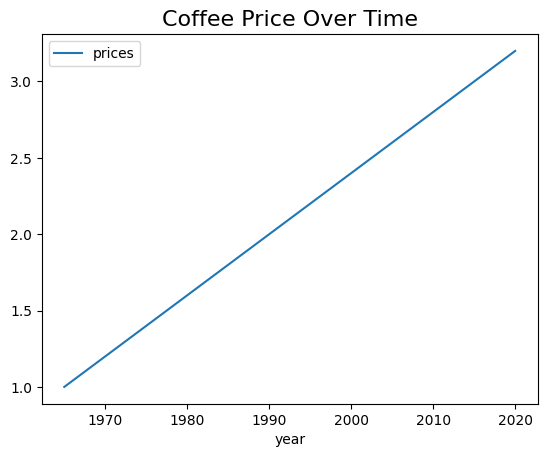

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

years = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
prices = [1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40, 2.60, 2.80, 3.00, 3.20]

data = pd.DataFrame({
    'year' : years,
    'prices': prices
})
ax = data.plot.line(x='year')
ax.set_title('Coffee Price Over Time', fontsize=16)
plt.show()

To make predictions for the price of coffee in this hypothetical town, you could
just put your ruler next to the graph and continue the upward line: the prediction for this variable does not need any explanatory variables other than its past values. The historical data of this example allows you to forecast the future. This is a determining characteristic of time series models.

Now let’s see a comparable example but with the prices of hot chocolate rather
than the prices of a cup of coffee and quarterly data rather than data every five years

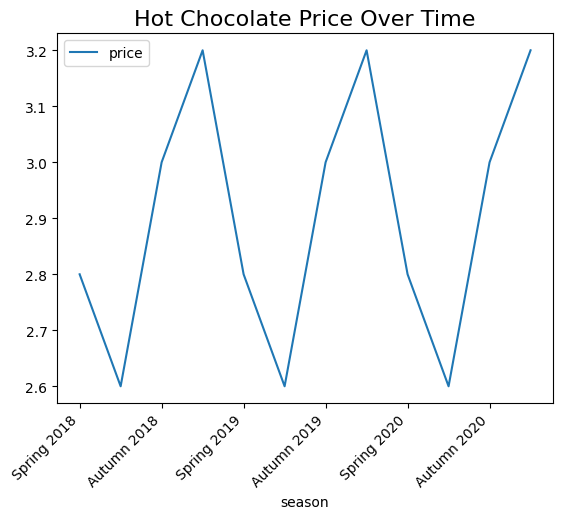

In [ ]:
seasons = ["Spring 2018", "Summer 2018", "Autumn 2018", "Winter 2018",
           "Spring 2019", "Summer 2019", "Autumn 2019", "Winter 2019",
           "Spring 2020", "Summer 2020", "Autumn 2020", "Winter 2020"]
prices = [2.80, 2.60, 3.00, 3.20,
          2.80, 2.60, 3.00, 3.20,
          2.80, 2.60, 3.00, 3.20]

data = pd.DataFrame({
    'season': seasons,
    'price': prices
})

ax = data.plot.line(x='season')
ax.set_title('Hot Chocolate Price Over Time', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Do you see the trend? In the case of hot chocolate, you do not have a year-over-year increase in price, but you do detect seasonality: in the example, hot chocolate prices follow the temperatures of the seasons.

**Note:** Univariate time series models make predictions based on trends and
seasonality observed in their own past and do not use explanatory variables other than the target variable: the variable that you want to forecast. You can imagine numerous types of combinations of those two processes, for example, have both a quarterly seasonality and a linear increasing trend and so on. There are many types of processes that can be forecasted by modeling the historical values of the target variable

Now that you are familiar with the idea of using the past of one variable, you are going to discover a different approach to making models. You have just seen univariate time series models, which are models that use only the past of a variable itself to predict its future. Sometimes, this approach is not logical: processes do not always follow trends and seasonality. Some predictions that you would want to make may be dependent on other, independent sources of information: explanatory variables. In those cases, you can use a family of methods called supervised machine learning that allows you to model relationships between explanatory variables and a target variable.

To understand this case, you have the fictitious data that contains the sales amount of a company per quarter, with three years of historical data.

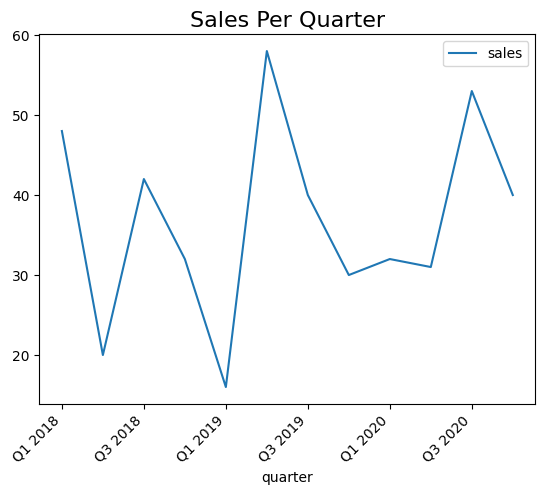

In [ ]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]


data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

What you can see in this graph does not resemble the previous examples: there is
no clear linear trend (neither increasing nor decreasing), and there is no clear quarterly seasonality either. But as the data is about sales, you could imagine many factors that influence the sales that you’ll realize. Let’s look for explanatory variables that could help in explaining sales. In Table 1-4, the data have been updated with two explanatory variables: discount and advertising budget. Both are potential variables that could influence sales numbers.

Let’s have a look at whether it would be possible to use those variables for a
prediction of sales

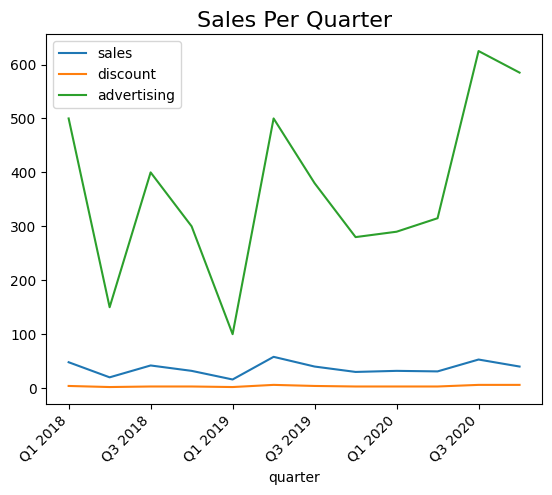

In [ ]:


quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts,
    'advertising': advertising
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()



At this point, visually, you’d probably say that there is not a very important
relationship between the three variables. But let’s have a more zoomed-in look at the same graph

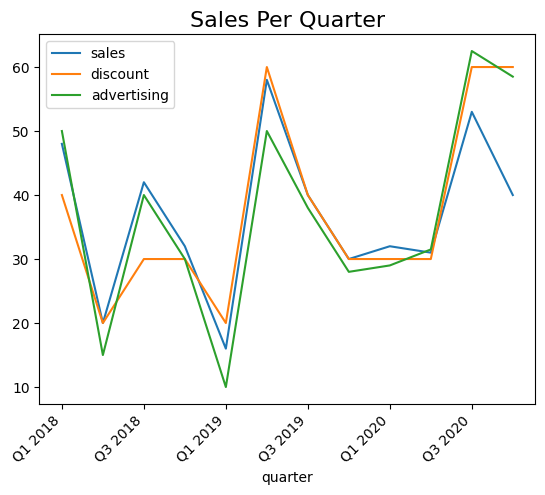

In [ ]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

discounts_scale_adjusted = [x * 10 for x in discounts]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

advertising_scale_adjusted = [x / 10 for x in advertising]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts_scale_adjusted,
    'advertising': advertising_scale_adjusted
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Imagine you observe a correlation as strong as in the Figure above. If you had to do this sales forecast for next month, you could simply ask your colleagues what the average discount is going to be next month and what next month’s advertising budget is, and you would be able to come up with a reasonable guess of the future sales.

Correlation Coefficient

The visual way to detect correlation is great. Yet there is a more exact way to investigate relationships between variables: the correlation coefficient. The correlation coefficient is a very important measure in statistics and machine learning as it determines how much two variables are correlated.

A correlation matrix is a matrix that contains the correlations between each pair of variables in a dataset. This is how to obtain a correlation matrix.

In [ ]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sales,discount,advertising
sales,1.000000,0.848135,0.902568
discount,0.848135,1.000000,0.920958
advertising,0.902568,0.920958,1.000000


A correlation coefficient is always between -1 and 1. A positive value for the
correlation coefficient means that two variables are positively correlated: if one is higher, then the other is generally also higher. If the correlation coefficient is negative, there is a negative correlation: if one value is higher, then the other is generally lower. This is the direction of the correlation.

There is also a notion of the strength of the correlation. A correlation that is close to 1 or close to -1 is strong. A correlation coefficient that is close to 0 is a weak correlation. Strong correlations are generally more interesting, as an explanatory variable that strongly correlated to your variable can be used for forecasting it.

**WARNING:** Don't **BELIEVE** in correlation !!!

https://stats.stackexchange.com/questions/41734/attainable-correlations-for-lognormal-random-variables